In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

음.. QGis를 통해서 각종 파일을 열어보려고 했는데  
(shx, shp , prj , dbf , cpg)  
계속 만져는 보고 있는데 자꾸 안된다고 나오네요.. 이유가 뭘까요..?   
<img width="494" alt="스크린샷 2023-05-08 오전 1 24 50" src="https://user-images.githubusercontent.com/91362178/236696338-8781614f-ebde-40c1-b8ce-f616bb4ea7cc.png">


그리고 음 잘 모르겠네요.. ㅜㅠ  
<img width="913" alt="스크린샷 2023-05-08 오전 1 38 57" src="https://user-images.githubusercontent.com/91362178/236696355-74c7e9ea-dd3d-45ad-b7c1-7786d09b552b.png">

### 그래서 일단 서울시 우리마을가게 상권분석서비스에 있는 간략한 csv 정보만으로 x, y 좌표를 나타내보고자 합니다.  

In [21]:
# 좌표 검색을 위한 상권영역 데이터
sangkwon_1 = pd.read_csv('data/상권영역_2.csv',encoding='CP949')

In [28]:
sangkwon_1

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보
0,202112,A,골목상권,2110753,시흥동 은행나무사거리,191934,438813,11545,11545710,NaN
1,202112,A,골목상권,2110427,노원 을지대학교병원,206265,459431,11350,11350611,NaN
2,202112,A,골목상권,2110755,동일여자고등학교,192300,439070,11545,11545680,NaN
3,202112,A,골목상권,2110739,시흥3동 우편취급국,191289,438014,11545,11545690,NaN
4,202112,A,골목상권,2111017,송파나루역 3번,210222,445516,11710,11710562,NaN
...,...,...,...,...,...,...,...,...,...,...
1666,202112,U,관광특구,1001493,동대문패션타운 관광특구,200974,451975,11140,11140590,NaN
1667,202112,U,관광특구,1001494,종로?청계 관광특구,199768,452273,11110,11110615,NaN
1668,202112,U,관광특구,1001495,잠실 관광특구,210191,446339,11710,11710566,NaN
1669,202112,U,관광특구,1001496,강남 마이스 관광특구,205310,445727,11680,11680580,NaN


In [25]:
print(sangkwon_1['상권_코드'].nunique())
print(sangkwon_1['상권_코드_명'].nunique())

1671
1671


In [26]:
# 기존 commercial_inner
df1 = pd.read_csv("preprocessed_data/commercial_inner.csv",encoding='UTF-8')


In [30]:
temp=[]
for i in sangkwon_1['상권_코드_명']:
    for j in df1['상권_코드_명']:
        if(i==j and i not in temp):
            temp.append(i)
        else: continue

print(temp)

['시흥동 은행나무사거리', '노원 을지대학교병원', '동일여자고등학교', '시흥3동 우편취급국', '송파나루역 3번', '중화역 1번', '역삼월드메르디앙아파트', '돌곶이역 3번', 'KB국민은행 중화동지점', '영서중학교', '서울시인재개발원', '한국상담대학원대학교', '남부초등학교', '신한은행 방학동지점', '국민은행방학지점', '왕십리파출소', '선유도역 6번', '강동성심병원', '목4동주민센터', '우사단길', '금천파출소', '방이역 2번', '신촌역 6번', '청구역 1번', '강남세브란스병원미래의학연구센터', '방배배수지체육공원', '베르사이유1아파트', '난우초등학교', '난곡중학교', '개포지하차도 북측', '가산동주민센터', '가산디지털단지역 1번 출입구', '바우뫼공원', '윗방죽마을공원', '언남고등학교', '이태원엔틱가구거리', '오산중학교', '상봉역 3번', '신내역 2번', '금호사거리', '대흥역 3번', '석촌역 7번', '서울독일학교', '화곡보람2차아파트', '둔촌푸르지오아파트', '돌곶이역 8번', '당산역 8번', '언주역 8번', '삼전역 4번', '홍익대', '세종대학교', '상왕십리역 6번', '미근동', '홍남교남측', '황학동벼룩시장', '마장역 2번', '천일초등학교', '보문역 5번', '연가초등학교', '중곡1동 마을마당', '신묵초등학교', '문정역 1번', '서초중학교', '내방역 5번', '대동초등학교', '조원동주민센터', 'KT구로지사', '방배역 3번', '중랑노인종합복지관', '한전아트센터', '마포경찰서', '신원동주민센터', '보라매역 4번', '도곡초등학교', '마천공원', '벌말어린이공원', '대림역 11번', '고척초등학교', '방배아이파크아파트', '구로119안전센터', '삼성중앙역 7번', '한남IC', '문정역 2번', '목동역 5번', '서울공연예술고등학교', '양평역 2번', '미림여고', '난우중학교', '신성초등학교', '금천구립가산도서관', '신중초등학교', '송

In [59]:
print(len(temp))


1486


In [60]:
s1 = list(df1['상권_코드_명'].unique())

In [61]:
print(len(s1))

1511


In [71]:
not_in_temp=[]
for i in s1:
    for j in temp:
        if(i != j and i not in not_in_temp and i not in temp):
            not_in_temp.append(i)
        else: continue

In [73]:
print(len(not_in_temp))
print(len(s1))
print(1511- 1486)

25
1511
25


In [76]:
print(not_in_temp)

['국립419민주묘지', '419민주묘지역 2번', 'KTG 북부지사', '천왕역 3번(오류2동주민센터 서울오류남초등학교)', '신림역 5번(신림동주민센터 신림동별빛거리)', '삼성전자서울RD(서울우면초등학교)', '숙대입구역(남영역 남영동)', '신촌역(신촌역 신촌로터리)', '이화여대(이대역 이대)', '총신대입구역(이수 총신대)', '교대역(법원검찰청)', '양재시민의숲역(양재동꽃시장 aT센터)', '강남구청(청담역_8번 강남세무서)', '황학시장(서울중앙시장 신중앙시장)', '한양대앞상점가(한양시장 왕십리맛골목)', '중곡제일시장(중곡제일골목시장 광성시장)', '동원전통종합시장(동원시장 동원전통시장 상점가)', '솔샘시장(미아67동골목시장)', '수유전통시장(수유시장 수유골목시장)', '오도봉거리 상점가', '대림골목시장(대림시장 양지시장)', '이화여대 357길 상점가', '신월7동 골목시장(약수시장 우성상가)', '남부골목시장(남부화곡시장 남부시장)', '종로청계 관광특구']


##### 이것저것 했는데 결국 25개 빼곤 기존의 commercial_inner에 있는 상권코드에 있는 좌표라는것을 알 수 있음  

In [79]:
print(len(temp))
print(len(s1))

1486
1511


In [84]:
# 엑스좌표_값 , 와이좌표_값
sangkwon_1 = sangkwon_1[['상권_코드_명','엑스좌표_값','와이좌표_값']]

In [85]:
sangkwon_1

,상권_코드_명,엑스좌표_값,와이좌표_값
0,시흥동 은행나무사거리,191934,438813
1,노원 을지대학교병원,206265,459431
2,동일여자고등학교,192300,439070
3,시흥3동 우편취급국,191289,438014
4,송파나루역 3번,210222,445516
...,...,...,...
1666,동대문패션타운 관광특구,200974,451975
1667,종로?청계 관광특구,199768,452273
1668,잠실 관광특구,210191,446339
1669,강남 마이스 관광특구,205310,445727


In [86]:
data = pd.merge(df1, sangkwon_1, how='inner')
data



,기준_년_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,집객시설_수,아파트_평균_면적,아파트_평균_시가,상권_변화_지표,...,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,구분,점포_수,매출_금액,매출_건수,엑스좌표_값,와이좌표_값
0,2017,A,골목상권,2110001,이북5도청사,139405.75,22.5,124.0,376996219.5,LH,...,83.75,60.25,98.75,51.25,개인_서비스업,116,3.230693e+07,398,196193,456641
1,2017,A,골목상권,2110001,이북5도청사,139405.75,22.5,124.0,376996219.5,LH,...,83.75,60.25,98.75,51.25,교육_및_사업자원_서비스업,128,2.660860e+07,166,196193,456641
2,2017,A,골목상권,2110001,이북5도청사,139405.75,22.5,124.0,376996219.5,LH,...,83.75,60.25,98.75,51.25,기타_도소매업,98,2.564806e+06,96,196193,456641
3,2017,A,골목상권,2110001,이북5도청사,139405.75,22.5,124.0,376996219.5,LH,...,83.75,60.25,98.75,51.25,생활용품_도소매업,151,3.070350e+07,358,196193,456641
4,2017,A,골목상권,2110001,이북5도청사,139405.75,22.5,124.0,376996219.5,LH,...,83.75,60.25,98.75,51.25,수리업,24,1.999051e+08,874,196193,456641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105310,2022,R,전통시장,2130036,중부시장(신중부시장),927336.00,18.0,15.0,148636943.0,HH,...,163.75,88.00,121.25,55.50,숙박업,17,3.510748e+07,308,200025,451782
105311,2022,R,전통시장,2130036,중부시장(신중부시장),927336.00,18.0,15.0,148636943.0,HH,...,163.75,88.00,121.25,55.50,스포츠_및_오락_서비스업,25,1.061767e+07,375,200025,451782
105312,2022,R,전통시장,2130036,중부시장(신중부시장),927336.00,18.0,15.0,148636943.0,HH,...,163.75,88.00,121.25,55.50,식료품_도소매업,1663,7.184864e+09,147094,200025,451782
105313,2022,R,전통시장,2130036,중부시장(신중부시장),927336.00,18.0,15.0,148636943.0,HH,...,163.75,88.00,121.25,55.50,음식점_및_주점업,243,5.655092e+08,19070,200025,451782


In [87]:
print(data.shape)

(105315, 21)


#### 25개의 상권코드 빼고 나머지애들의 좌표값 최신화 완료  

In [88]:
data.to_csv('/Users/junny/Downloads/쭌/쭌_학교관련/23_1_수업/캡디/5주차/KimJuneHyun_EDA/preprocessed_data/commercial_with_xy.csv',index=None)


#### Kmeans Clustering을 진행시켜보자  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import rc
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

# 실루엣 계수 : 군집화 결과를 평가하는 지표로써 각 데이터별로 
# 그 데이터가 속한 군 내의 거리기반 유사도와 인접한 군의 유사도를 비교하는 지표
from sklearn.metrics import silhouette_score 

# 클러스터링 최적 개수 확인 위한 elbow method 수행
#from yellowbrick.cluster import KElbowVisualizer
# 3.10.11 -> 3.9로 바꿨는데 왜 또 이러는거지?
# anaconda환경을 새로 깔았다. 기존의 (base)3.9.16이 버전문제인지 몰라도 계속 커널이 죽어서
# 새로 3.10버전으로 깔았지만 yellowbrick이 안깔려서 3.9.16의 가상환경으로 다시 깔아주니 yellowbrick까지 잘 실행 되었다.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


![image](https://user-images.githubusercontent.com/91362178/236805033-8dab9160-3cd5-40a5-b01d-d6caa3aa3fd1.png)   

군집내 유사도는 크고 인접한 군집간 유사도가 작게 나오면 실루엣계수는 커지고  
클수록 군집화가 잘 되어있다고 판단함.   
-> 뭉탱이로 더 잘 명확히 보이면 실루엣 계수가 크다~!~ 라는 뜻임  

In [2]:
data = pd.read_csv("preprocessed_data/commercial_with_xy.csv",encoding = "UTF-8")

In [3]:
data

,기준_년_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,집객시설_수,아파트_평균_면적,아파트_평균_시가,상권_변화_지표,...,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,구분,점포_수,매출_금액,매출_건수,엑스좌표_값,와이좌표_값
0,2017,A,골목상권,2110001,이북5도청사,139405.75,22.5,124.0,376996219.5,LH,...,83.75,60.25,98.75,51.25,개인_서비스업,116,3.230693e+07,398,196193,456641
1,2017,A,골목상권,2110001,이북5도청사,139405.75,22.5,124.0,376996219.5,LH,...,83.75,60.25,98.75,51.25,교육_및_사업자원_서비스업,128,2.660860e+07,166,196193,456641
2,2017,A,골목상권,2110001,이북5도청사,139405.75,22.5,124.0,376996219.5,LH,...,83.75,60.25,98.75,51.25,기타_도소매업,98,2.564806e+06,96,196193,456641
3,2017,A,골목상권,2110001,이북5도청사,139405.75,22.5,124.0,376996219.5,LH,...,83.75,60.25,98.75,51.25,생활용품_도소매업,151,3.070350e+07,358,196193,456641
4,2017,A,골목상권,2110001,이북5도청사,139405.75,22.5,124.0,376996219.5,LH,...,83.75,60.25,98.75,51.25,수리업,24,1.999051e+08,874,196193,456641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105310,2022,R,전통시장,2130036,중부시장(신중부시장),927336.00,18.0,15.0,148636943.0,HH,...,163.75,88.00,121.25,55.50,숙박업,17,3.510748e+07,308,200025,451782
105311,2022,R,전통시장,2130036,중부시장(신중부시장),927336.00,18.0,15.0,148636943.0,HH,...,163.75,88.00,121.25,55.50,스포츠_및_오락_서비스업,25,1.061767e+07,375,200025,451782
105312,2022,R,전통시장,2130036,중부시장(신중부시장),927336.00,18.0,15.0,148636943.0,HH,...,163.75,88.00,121.25,55.50,식료품_도소매업,1663,7.184864e+09,147094,200025,451782
105313,2022,R,전통시장,2130036,중부시장(신중부시장),927336.00,18.0,15.0,148636943.0,HH,...,163.75,88.00,121.25,55.50,음식점_및_주점업,243,5.655092e+08,19070,200025,451782


In [4]:
len(data.columns) # data has 21 columns

21

In [5]:
data.columns

Index(['기준_년_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '총_생활인구_수',
       '집객시설_수', '아파트_평균_면적', '아파트_평균_시가', '상권_변화_지표', '상권_변화_지표_명',
       '운영_영업_개월_평균', '폐업_영업_개월_평균', '서울_운영_영업_개월_평균', '서울_폐업_영업_개월_평균', '구분',
       '점포_수', '매출_금액', '매출_건수', '엑스좌표_값', '와이좌표_값'],
      dtype='object')

#### data의 col이 21개라서 차원축소를 하는게 더욱 효과적일 것으로 판단되나, 일단 kmeans로 얼만큼의 silhouette 계수가 나오는지 판단해봐야 알 수 있다.  
##### 또한, numeric한 column값중에 ordinal, nominal하지 않은 continuous, discrete한 variable만 일단 체크해보도록 한다.  
-> 질적변수 말고 양적변수에서만 골라서 clustering해보겠다는 말.  

In [6]:
data_check = data[['총_생활인구_수','집객시설_수','아파트_평균_면적','아파트_평균_시가','운영_영업_개월_평균','폐업_영업_개월_평균','서울_운영_영업_개월_평균','서울_폐업_영업_개월_평균','점포_수','매출_금액','매출_건수']]

In [7]:
data_check

,총_생활인구_수,집객시설_수,아파트_평균_면적,아파트_평균_시가,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균,점포_수,매출_금액,매출_건수
0,139405.75,22.5,124.0,376996219.5,83.75,60.25,98.75,51.25,116,3.230693e+07,398
1,139405.75,22.5,124.0,376996219.5,83.75,60.25,98.75,51.25,128,2.660860e+07,166
2,139405.75,22.5,124.0,376996219.5,83.75,60.25,98.75,51.25,98,2.564806e+06,96
3,139405.75,22.5,124.0,376996219.5,83.75,60.25,98.75,51.25,151,3.070350e+07,358
4,139405.75,22.5,124.0,376996219.5,83.75,60.25,98.75,51.25,24,1.999051e+08,874
...,...,...,...,...,...,...,...,...,...,...,...
105310,927336.00,18.0,15.0,148636943.0,163.75,88.00,121.25,55.50,17,3.510748e+07,308
105311,927336.00,18.0,15.0,148636943.0,163.75,88.00,121.25,55.50,25,1.061767e+07,375
105312,927336.00,18.0,15.0,148636943.0,163.75,88.00,121.25,55.50,1663,7.184864e+09,147094
105313,927336.00,18.0,15.0,148636943.0,163.75,88.00,121.25,55.50,243,5.655092e+08,19070


/Users/junny/Downloads/쭌/쭌_학교관련/23_1_수업/캡디/5주차/KimJuneHyun_EDA/.conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/junny/Downloads/쭌/쭌_학교관련/23_1_수업/캡디/5주차/KimJuneHyun_EDA/.conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/junny/Downloads/쭌/쭌_학교관련/23_1_수업/캡디/5주차/KimJuneHyun_EDA/.conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/junny/Downloads/쭌/쭌_학교관련/23_1_수업/캡디/5주차/KimJuneHyun_EDA/.conda/lib/python3.9/site-packages

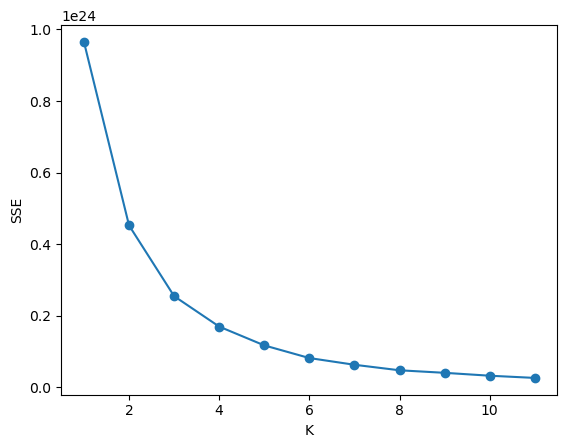

In [8]:
def Elbow(X):
    sse = [] # explained sum of squares 
    for i in range(1,12):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42) # random_state값은 무작위성을 추가하는데 사용되는 seed라서 어떤값을 넣던 상관은 없음
        km.fit(X)
        sse.append(km.inertia_)# inertia : cluster중심과 cluster에 속한 sample사이의 거리 제곱 합

    plt.plot(range(1,12), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

Elbow(data_check)

In [9]:
best_n = 1 
best_score = -1

for n_cluster in range(2, 12): 
  kmeans = KMeans(n_clusters=n_cluster) 
  kmeans.fit(data_check) 
  cluster = kmeans.predict(data_check) 
  score = silhouette_score(data_check, cluster)

  print('k = {} 일 때의 실루엣 점수 : {:.2f}'.format(n_cluster, score))

  if score > best_score :
      best_n = n_cluster
      best_score = score

print('k = {} 일 때 가장 높은 실루엣 점수 {:.2f}을 얻는다'.format(best_n, best_score))

/Users/junny/Downloads/쭌/쭌_학교관련/23_1_수업/캡디/5주차/KimJuneHyun_EDA/.conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 2 일 때의 실루엣 점수 : 1.00


/Users/junny/Downloads/쭌/쭌_학교관련/23_1_수업/캡디/5주차/KimJuneHyun_EDA/.conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 3 일 때의 실루엣 점수 : 0.98


/Users/junny/Downloads/쭌/쭌_학교관련/23_1_수업/캡디/5주차/KimJuneHyun_EDA/.conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k = 4 일 때의 실루엣 점수 : 0.96


/Users/junny/Downloads/쭌/쭌_학교관련/23_1_수업/캡디/5주차/KimJuneHyun_EDA/.conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 